In [1]:
import numpy as np
import matplotlib.pyplot as plt

def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

In [2]:
def temp(wav,T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    return a/ ( (wav**5)*(np.exp(b) - 1.0) )

def temp2(wav,T,corr):
    wav = wav*corr
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    return a/ ( (wav**5)*(np.exp(b) - 1.0) )
## Firstly notice it is hard to tell a sum of blackbodies appart

In [3]:
from scipy.integrate import quad
def integrand(x, vphot):
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 
def integral(x): 
    return np.sqrt(1-vphot**2) * 1/(1-vphot*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 

vphot_list = []
beta_list = np.linspace(0.0,1,200)
for i in beta_list: 
    vphot = i
    vphot_list.append(quad(integral, 0, np.pi/2)[0])
    
#y = (3*(beta_list-2)*beta_list-)/(2*beta_list**3)

In [4]:
x_arr = np.linspace(0, np.pi/2, 20)
x_center = (x_arr[1:]+x_arr[:-1])/2
#for i in range(10): 
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])

vphot = 0.3
corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))

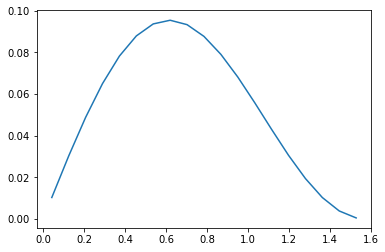

In [5]:
plt.plot(x_center, areas)

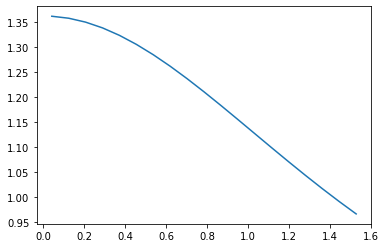

In [6]:
plt.plot(x_center, corr)


In [7]:
plt.plot(x_center, T_n/4500)

NameError: name 'T_n' is not defined

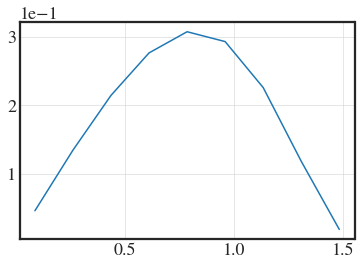

In [71]:
plt.plot(x_center, (T_n/4500)**4 * areas )

In [74]:
np.sum((T_n/4500)**4 * areas)

1.6343196293949278

In [11]:
for vphot in [0.1,0.2,0.3,0.278]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))


In [12]:
reset_plt(18,20)
plt.figure(figsize=(10,6))

plt.plot( X, temp(X, 5000) , label='Input BB')
plt.plot( X, temp(X*np.average(corr,weights=areas), 5000), label='Shifted BB', ls='--') 
#plt.plot( X, np.sum([temp(X, 5000)*i for i in corr*areas],axis=0) )
#plt.plot( X, np.sum([temp(X, 5000*i  ) for i in corr], axis=0) )

plt.plot( X, np.average([temp(X*i, 5000) for i in corr], axis=0, weights=areas), label='Convolved BB', ls='dotted')
plt.legend(frameon=True)
plt.xlabel('Wavelength [m]'), plt.ylabel('Flux') 

#plt.savefig('Pictures/Convolved_BB_example.png', dpi=300)

NameError: name 'X' is not defined

<Figure size 720x432 with 0 Axes>

In [19]:
corr

array([1.28935898, 1.27649593, 1.25189679, 1.21759462, 1.17616427,
       1.13032825, 1.08263071, 1.03523016, 0.9898128 ])

In [26]:
T_n

array([4500., 4500., 4500., 4500., 4500., 4500., 4500., 4500., 4500.])

In [160]:
np.average(corr, weights=areas)**4

2.046814767517878

In [138]:
np.average(corr) 

1.1942047033686614

In [132]:
np.std(corr)/np.sqrt(10)

0.04114168476475239

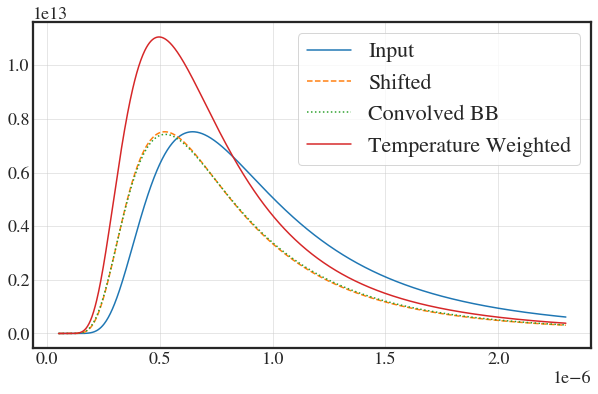

In [8]:
v_phot=0.28
vbb = v_phot
T = 4500
wav = np.linspace(500e-10, 23000e-10,1000)

reset_plt(18,22)
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4

corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)

plt.plot(wav, intensity, label='Temperature Weighted')

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


plt.legend(frameon=True)

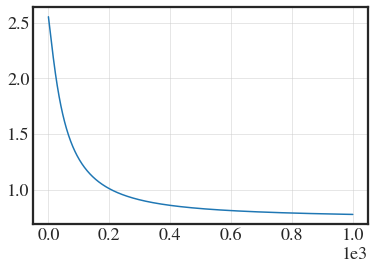

In [81]:
conv = np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)

plt.plot( (intensity/np.max(intensity))/(conv/np.max(conv)) )

In [162]:
corr, np.average(corr, weights=areas), np.std(corr)

(array([1.28935898, 1.27649593, 1.25189679, 1.21759462, 1.17616427,
        1.13032825, 1.08263071, 1.03523016, 0.9898128 ]),
 1.1961059077197136,
 0.10204359225650322)

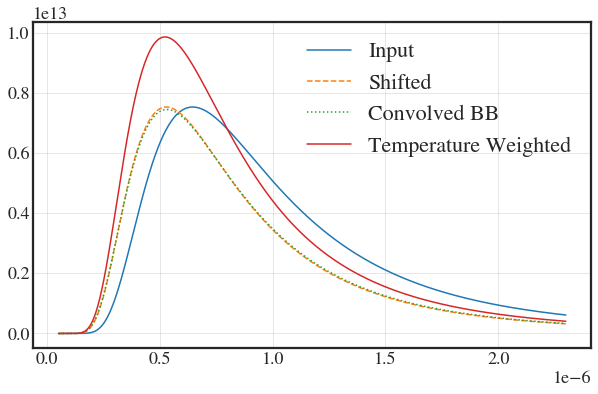

In [9]:
reset_plt(18,22)
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*2.4


v_phot=0.23
vbb = v_phot
T = 4500
wav = np.linspace(500e-10, 23000e-10,1000)
corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)

plt.plot(wav, intensity, label='Temperature Weighted')

#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


plt.legend()

total = 5.542682603051308
0.22650463532470647
0.6781077318219517
1.1164836728913634
1.5035608714021305
1.762821590557425
1.7839131760910125
1.4650087347816727
0.8168288252545298
0.13477201780126813
Sum =  9.488001255926061


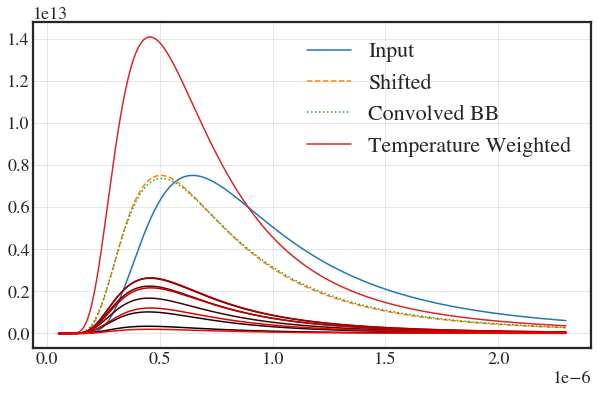

In [70]:
v_phot=0.35
vbb = v_phot
T = 4500
wav = np.linspace(500e-10, 23000e-10,1000)

reset_plt(18,22)
plt.figure(figsize=(10,6))
plt.plot(wav, temp(wav, T), label='Input') 
plt.plot(wav, temp(wav*np.average(corr,weights=areas), T), ls='--', alpha=1, label='Shifted') 
#np.average(corr, weights=areas)**4*
plt.plot(wav, np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas), 
         label='Convolved BB', ls='dotted')

print('total =', np.sum(np.average([temp2(wav, T, i) for i in corr], axis=0, weights=areas)*(wav[1]-wav[0]))*1e-6)


#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4

corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
plt.plot(wav, intensity, label='Temperature Weighted')


intensity = np.array([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)])*areas[:,None]
summen = 0
for i in range(9):
    plt.plot(wav, intensity[i], color=[i/8, 0, 0])
    print(np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6)
    summen +=np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6
print('Sum = ',summen)
#from scipy.interpolate import interp1d
#beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
#inter = interp1d(beta, doppler)
#delta = inter(v_phot) 
#corr2 = delta**4
#corr = (1-v_phot**2)**(1/2)*1/(1-v_phot*np.cos(x_center))


plt.legend()

In [77]:
10**4/86000

0.11627906976744186

0.22650463532470647
0.6781077318219517
1.1164836728913634
1.5035608714021305
1.762821590557425
1.7839131760910125
1.4650087347816727
0.8168288252545298
0.13477201780126813


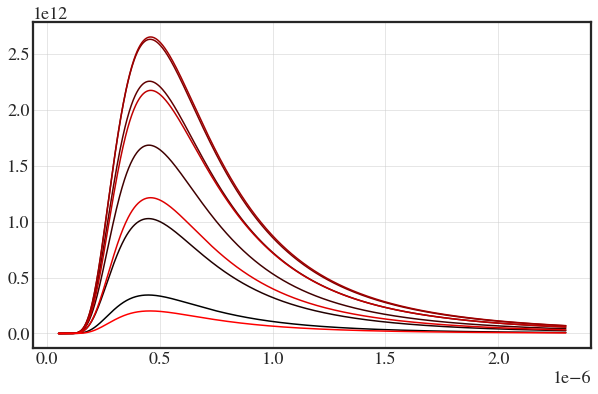

In [61]:
reset_plt(18,22)
plt.figure(figsize=(10,6))

#area
x_arr = np.linspace(0, np.pi/2, 10)
x_center = (x_arr[1:]+x_arr[:-1])/2
areas = 3*np.sin(x_center)*np.cos(x_center)**2 * (x_arr[1]-x_arr[0])
t_0 = 24*3600*1.4

corr = (1-vbb**2)**(1/2)*1/(1-vbb*np.cos(x_center))
    
#This includes the cooling of temperatures using Drout2017
t = vbb*t_0/(1-vbb) - np.cos(x_center) * (vbb*t_0)/(1-vbb*np.cos(x_center))
#T_n = T*np.ones_like(t) #
T_n = T*((t_0-t)/t_0)**(-0.54)
intensity = np.average([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)], axis=0, weights=areas)
#plt.plot(wav, intensity, label='Temperature Weighted')

x = np.zeros_like(intensity)

intensity = np.array([temp2(wav, T_i, i) for i,T_i in zip(corr,T_n)])*areas[:,None]
for i in range(9):
    plt.plot(wav, intensity[i], color=[i/8, 0, 0])
    print(np.sum(intensity[i]*(wav[1]-wav[0]))*1e-6)
    x += intensity[i]
#plt.plot(wav, x, label='Temperature Weighted')


In [55]:
areas

array([0.04528799, 0.12643939, 0.18176   , 0.20152037, 0.18512012,
       0.14110609, 0.08475608, 0.03387933, 0.00396219])

In [56]:
np.sum(areas)

1.0038315658567054

(3.6e-07, 2.3e-06)

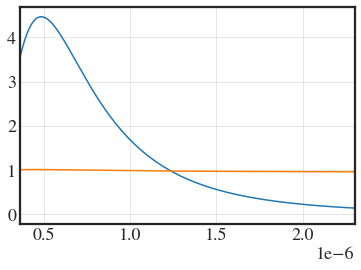

In [127]:
plt.plot(wav, intensity/np.average([temp2(wav, T, i) for i in corr]) ) 
#plt.plot(wav, intensity/temp(wav, T))
plt.plot(wav,  temp(wav*np.average(corr,weights=areas), T)/np.average([temp2(wav, T, i) for i in corr],
                                                                      axis=0, weights=areas) ) 
    
plt.xlim(3600e-10, 23000e-10)
#plt.ylim(1,1.5)
#plt.yscale('log') 

In [99]:
corr2

1.3410730620713258

In [100]:
reset_plt(18,20)
plt.figure(figsize=(10,6))

plt.plot( X, temp(X, 5000) , label='Input BB')
plt.plot( X, temp(X, 5000*np.average(corr,weights=areas)), label='Shifted BB', ls='--') 
#plt.plot( X, np.sum([temp(X, 5000)*i for i in corr*areas],axis=0) )
#plt.plot( X, np.sum([temp(X, 5000*i  ) for i in corr], axis=0) )

plt.plot( X, np.average([temp(X, 5000*i) for i in corr], axis=0, weights=areas), label='Convolved BB', ls='dotted')
plt.legend(frameon=True)
plt.xlabel('Wavelength [m]'), plt.ylabel('Flux') 

#plt.savefig('Pictures/Convolved_BB_example.png', dpi=300)

NameError: name 'X' is not defined

<Figure size 720x432 with 0 Axes>

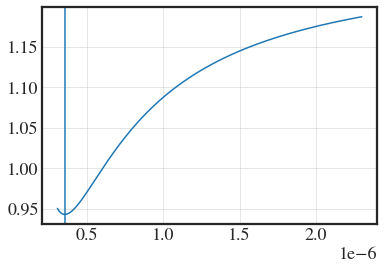

In [269]:
ratio = np.average([temp(X*i, 5000) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), 5000)
plt.plot(X[130:], ratio[130:])

plt.axvline(3600e-10)

In [236]:
np.average(ratio[80:])

1.0202287486310284

1.0045579612154285
1.0087222947571561
1.0122151422286008
1.0166348034082149


((0.95, 1.05), (3e-07, 2.3e-06))

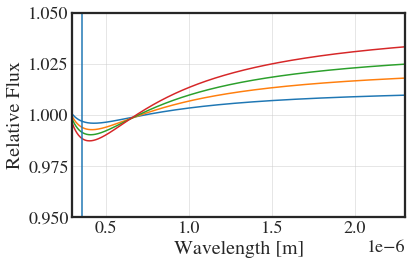

In [281]:
for vphot in [0.17,0.22,0.25,0.28]: 
    corr = (1-vphot**2)**(1/2)*1/(1-vphot*np.cos(x_center))
    ratio = np.average([temp(X*i, 5000) for i in corr], axis=0, weights=areas)/temp(X*np.average(corr,weights=areas), 5000)

    plt.plot(X[80:], ratio[80:])
    print(np.average(ratio[130:]))
plt.xlabel('Wavelength [m]'), plt.ylabel('Relative Flux'), plt.tight_layout() 
plt.axvline(3600e-10)
plt.ylim(0.95, 1.05), plt.xlim(3000e-10, 23000e-10)
#plt.savefig('Pictures/Convolved_BB_example_ratio.png', dpi=300)

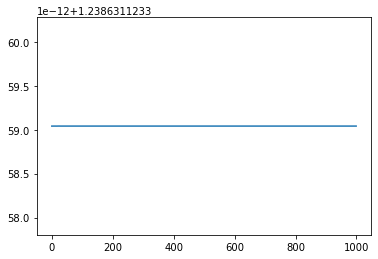

In [140]:
plt.plot( np.sum([temp(X, 5000)*i for i in corr*areas], axis=0)/temp(X, 5000) )

In [141]:
np.sum([temp(X, 5000)*i for i in corr*areas], axis=0)/temp(X, 5000)

array([1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863112,
       1.23863112, 1.23863112, 1.23863112, 1.23863112, 1.23863

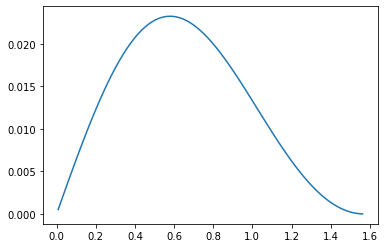